In [3]:
import names
import nltk

ModuleNotFoundError: No module named 'names'

In [11]:
from nltk.corpus import names

nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\cecil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


True

In [16]:


names.fileids()


['female.txt', 'male.txt']

In [22]:
namelist = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])

namelist

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male'),
 ('Abdullah', 'male'),
 ('Abe', 'male'),
 ('Abel', 'male'),
 ('Abelard', 'male'),
 ('Abner', 'male'),
 ('Abraham', 'male'),
 ('Abram', 'male'),
 ('Ace', 'male'),
 ('Adair', 'male'),
 ('Adam', 'male'),
 ('Adams', 'male'),
 ('Addie', 'male'),
 ('Adger', 'male'),
 ('Aditya', 'male'),
 ('Adlai', 'male'),
 ('Adnan', 'male'),
 ('Adolf', 'male'),
 ('Adolfo', 'male'),
 ('Adolph', 'male'),
 ('Adolphe', 'male'),
 ('Adolpho', 'male'),
 ('Adolphus', 'male'),
 ('Adrian', 'male'),
 ('Adrick', 'male'),
 ('Adrien', 'male'),
 ('Agamemnon', 'male'),
 ('Aguinaldo', 'male'),
 ('Aguste', 'male'),
 ('Agustin', 'male'),
 ('Aharon', 'male'),
 ('Ahmad', 'male'),
 ('Ahmed', 'male'),
 ('Ahmet', 'male'),
 ('Ajai', 'male'),
 ('Ajay', 'male'),
 ('Al', 'male'),
 ('Alaa', 'male'),
 ('Alain', 'male'),
 ('Alan', 'male

# Work with the movies start from here

In [4]:
import scraping_class
logfile = 'log.csv'## name your log file.
connector = scraping_class.Connector(logfile)

ModuleNotFoundError: No module named 'scraping_class'

In [2]:
#Defining url, the call and parsing
from bs4 import BeautifulSoup
import requests
url = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page=1&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'
response,callid = connector.get(url,'Exam')
html = response.text
soup = BeautifulSoup(html,'lxml')

#Here we define what node we are looking at
h3_node = soup.find('h3') # find table node with specific attribute

h3_node





<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt7131622/">Once Upon a Time... in Hollywood</a>
<span class="lister-item-year text-muted unbold">(2019)</span>
</h3>

In [62]:
#This is used to extract the names of the movies

headline = soup.find('h3') # search for the first headline: h1 tag. 
name = headline['class'][0].strip() # use the class attribute name as column name.
value = headline.text.strip() # extract text using build in method.
#print(name,':',value)
value.split('\n')[1]

'Once Upon a Time... in Hollywood'

In [211]:
# Loop it through 
movielist= []

for v in range(1, 3):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):
        headline_i = soup.findAll('h3')[i] # search for the first headline: h1 tag. 
        #name = headline_i['class'][0].strip() # use the class attribute name as column name.
        value = headline_i.text.strip() # extract text using build in method.
        film = value.split('\n')[1]
        movielist.append(film)
    
movielist

['Once Upon a Time... in Hollywood',
 'Scary Stories to Tell in the Dark',
 'Fast & Furious: Hobbs & Shaw',
 'Little Women',
 'Avengers: Endgame',
 'Løvernes konge',
 'Last Christmas',
 'Parasite',
 'Good Boys',
 'Aladdin',
 'Dora and the Lost City of Gold',
 'It del 2',
 'The Hunt',
 'Aquaman',
 'Godzilla II: King of the Monsters',
 'Dolemite Is My Name',
 'The Art of Racing in the Rain',
 'Spider-Man: Far from Home',
 'Brightburn',
 'The Peanut Butter Falcon',
 'The Kitchen',
 'Operation Brothers',
 'Nomis',
 'Alita: Battle Angel',
 'Joker',
 'Midsommar',
 'Ready or Not',
 '47 Meters Down: Uncaged',
 'Rocketman',
 'John Wick 3: Parabellum',
 'Shazam!',
 'Blinded by the Light',
 'Angry Birds 2 - Filmen',
 'Long Shot',
 'Spider-Man: Into the Spider-Verse',
 'The Hustle',
 'Thor: Love and Thunder',
 'Inglourious Basterds',
 'Pulp Fiction',
 'Toy Story 4',
 'Pokémon Detective Pikachu',
 'Angel Has Fallen',
 'Kæledyrenes hemmelige liv 2',
 'Annabelle Comes Home',
 "Where'd You Go, Bernade

In [3]:
#Extract the year (WORKS)
#Look at the years for the movies and plot them

year_list= []

for v in range(1, 201):
    #url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_nxt&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc&sort=num_votes,desc'.format{v}
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_nxt&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc&sort=num_votes,desc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):
        headline_i = soup.findAll('h3')[i] # search for the first headline: h1 tag. 
        #name = headline_i['class'][0].strip() # use the class attribute name as column name.
        value = headline_i.text.strip() # extract text using build in method        
        film = value.split('\n')[2]
        if len(film)> 6:
            film = value.split(' ')[-1]
        year_list.append(film)


len(year_list)

year_list



['(1994)',
 '(2008)',
 '(2010)',
 '(1999)',
 '(1994)',
 '(1994)',
 '(1999)',
 '(2001)',
 '(2003)',
 '(1972)',
 '(2012)',
 '(2002)',
 '(2014)',
 '(1995)',
 '(2012)',
 '(2000)',
 '(2005)',
 '(2012)',
 '(1991)',
 '(2009)',
 '(1977)',
 '(1998)',
 '(1993)',
 '(2006)',
 '(2006)',
 '(1980)',
 '(2009)',
 '(2013)',
 '(2000)',
 '(1999)',
 '(2010)',
 '(1974)',
 '(1999)',
 '(2003)',
 '(1997)',
 '(2014)',
 '(1998)',
 '(2005)',
 '(1985)',
 '(1994)',
 '(1991)',
 '(1990)',
 '(2008)',
 '(2003)',
 '(1995)',
 '(1995)',
 '(2003)',
 '(2008)',
 '(1983)',
 '(2009)',
 '(1994)',
 '(1999)',
 '(1998)',
 '(1975)',
 '(1992)',
 '(2004)',
 '(2016)',
 '(1981)',
 '(1995)',
 '(2012)',
 '(1980)',
 '(1993)',
 '(2015)',
 '(2015)',
 '(2001)',
 '(1997)',
 '(2007)',
 '(2014)',
 '(2008)',
 '(2001)',
 '(1984)',
 '(2002)',
 '(1988)',
 '(2000)',
 '(2012)',
 '(1979)',
 '(2005)',
 '(2013)',
 '(2000)',
 '(2001)',
 '(2013)',
 '(2011)',
 '(2018)',
 '(1971)',
 '(2006)',
 '(2010)',
 '(2011)',
 '(2015)',
 '(2011)',
 '(2011)',
 '(2015)',

In [11]:
year_list[1][1:5]

'2008'

In [13]:
import seaborn as sns
import pandas as pd

year_listny = []

for i in range(10000):
    ny= year_list[i][1:5]
    year_listny.append(ny)




AttributeError: 'list' object has no attribute 'plot'

In [188]:
#Extrating the stars (not working)

stars_list= []

for v in range(1, 2):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(1,50):
        headline_i = soup.findAll('p', {'class':'test-muted text-small'})[i] # search for the first headline: h1 tag. 
        #name = headline_i['class'][0].strip() # use the class attribute name as column name.
        value = headline_i.text.strip() # extract text using build in method        
        film = value.split('\n')
        stars_list.append(film)

        

stars_list

IndexError: list index out of range

In [165]:
import re

year_list=[]

for i in range(50):
    headline_i = soup.findAll('h3')[1] # search for the first headline: h1 tag. 
    value = headline_i.text.strip() # extract text using build in method        
    film = value.split('\n')
    #film1 = value.split(' ')[-1]
    year_list.append(film1)

year_list


['(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)',
 '(2017)']

In [20]:
year_listny = []

for i in range(10000):
    ny = year_list[i][1:5]
    year_listny.append(ny)
    
year_listny

['1994',
 '2008',
 '2010',
 '1999',
 '1994',
 '1994',
 '1999',
 '2001',
 '2003',
 '1972',
 '2012',
 '2002',
 '2014',
 '1995',
 '2012',
 '2000',
 '2005',
 '2012',
 '1991',
 '2009',
 '1977',
 '1998',
 '1993',
 '2006',
 '2006',
 '1980',
 '2009',
 '2013',
 '2000',
 '1999',
 '2010',
 '1974',
 '1999',
 '2003',
 '1997',
 '2014',
 '1998',
 '2005',
 '1985',
 '1994',
 '1991',
 '1990',
 '2008',
 '2003',
 '1995',
 '1995',
 '2003',
 '2008',
 '1983',
 '2009',
 '1994',
 '1999',
 '1998',
 '1975',
 '1992',
 '2004',
 '2016',
 '1981',
 '1995',
 '2012',
 '1980',
 '1993',
 '2015',
 '2015',
 '2001',
 '1997',
 '2007',
 '2014',
 '2008',
 '2001',
 '1984',
 '2002',
 '1988',
 '2000',
 '2012',
 '1979',
 '2005',
 '2013',
 '2000',
 '2001',
 '2013',
 '2011',
 '2018',
 '1971',
 '2006',
 '2010',
 '2011',
 '2015',
 '2011',
 '2011',
 '2015',
 '2014',
 '2009',
 '2008',
 '1983',
 '1998',
 '2010',
 '1999',
 '2001',
 '2010',
 '2002',
 '2013',
 '2002',
 '2002',
 '2005',
 '1976',
 '1989',
 '2014',
 '2007',
 '1982',
 '1966',
 

In [22]:
years = list(map(int, year_listny))

years

[1994,
 2008,
 2010,
 1999,
 1994,
 1994,
 1999,
 2001,
 2003,
 1972,
 2012,
 2002,
 2014,
 1995,
 2012,
 2000,
 2005,
 2012,
 1991,
 2009,
 1977,
 1998,
 1993,
 2006,
 2006,
 1980,
 2009,
 2013,
 2000,
 1999,
 2010,
 1974,
 1999,
 2003,
 1997,
 2014,
 1998,
 2005,
 1985,
 1994,
 1991,
 1990,
 2008,
 2003,
 1995,
 1995,
 2003,
 2008,
 1983,
 2009,
 1994,
 1999,
 1998,
 1975,
 1992,
 2004,
 2016,
 1981,
 1995,
 2012,
 1980,
 1993,
 2015,
 2015,
 2001,
 1997,
 2007,
 2014,
 2008,
 2001,
 1984,
 2002,
 1988,
 2000,
 2012,
 1979,
 2005,
 2013,
 2000,
 2001,
 2013,
 2011,
 2018,
 1971,
 2006,
 2010,
 2011,
 2015,
 2011,
 2011,
 2015,
 2014,
 2009,
 2008,
 1983,
 1998,
 2010,
 1999,
 2001,
 2010,
 2002,
 2013,
 2002,
 2002,
 2005,
 1976,
 1989,
 2014,
 2007,
 1982,
 1966,
 2015,
 2014,
 2014,
 2014,
 2012,
 2004,
 2010,
 2006,
 1987,
 2011,
 2004,
 2009,
 1986,
 1957,
 2010,
 2016,
 2012,
 1996,
 2004,
 2007,
 2013,
 2016,
 2007,
 2002,
 2013,
 2006,
 2001,
 2010,
 2017,
 2007,
 2013,
 2001,

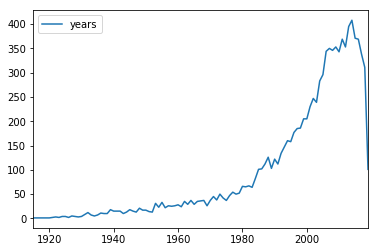

In [66]:
import seaborn as sns
import pandas as pd

years_pd = pd.DataFrame(years)


years_pd['count'] = 1

years_pd['years'] = years_pd[0]

#years_pd.groupby('years').value_counts()

tael = years_pd['years'].value_counts()

#res = df['YearMonth'].value_counts()
taelny = pd.DataFrame(tael)
#sns.barplot(x='years', data=tael)

taelny.sort_index().plot()

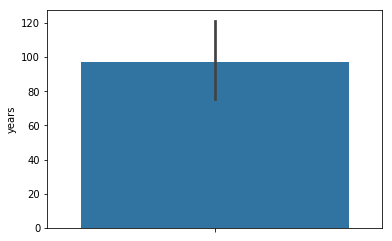

In [58]:
sns.barplot( y='years', data=taelny)

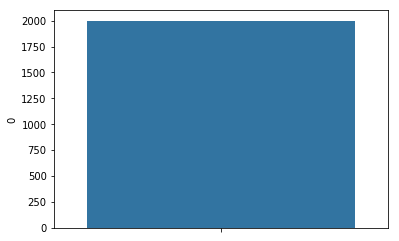

In [1]:
# Movies in the period from 1980 - 2019

#urlnew = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_yr&mode=detail&page=1&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc&sort=num_votes,desc&release_date=1980%2C2019'

year_list_modern= []

for v in range(1, 3):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_yr&mode=detail&page=1&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc&sort=num_votes,desc&release_date=1980%2C2019'
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):
        headline_i = soup.findAll('h3')[i] # search for the first headline: h1 tag. 
        value = headline_i.text.strip() # extract text using build in method        
        film = value.split('\n')[2]
        if len(film)> 6:
            film = value.split(' ')[-1]
        year_list_modern.append(film)


len(year_list_modern)

year_list_modern


NameError: name 'connector' is not defined

In [5]:
year_listny_modern = []

for i in range(10000):
    ny = year_list_modern[i][1:5]
    year_listny_modern.append(ny)
    
#year_listny_modern

IndexError: list index out of range

In [6]:
years_modern = list(map(int, year_listny_modern))

#years_modern

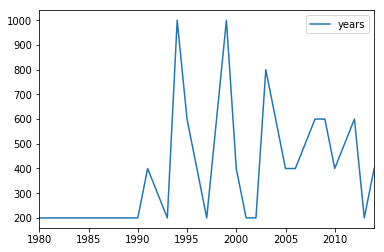

In [70]:
years_pd2 = pd.DataFrame(years_modern)


years_pd2['count'] = 1

years_pd2['years'] = years_pd2[0]

#years_pd.groupby('years').value_counts()

taelny = years_pd2['years'].value_counts()

#res = df['YearMonth'].value_counts()
taelnyny = pd.DataFrame(taelny)
#sns.barplot(x='years', data=tael)

taelnyny.sort_index().plot()

In [72]:
taelnyny.sort_index()

,years
1980,200
1983,200
1985,200
1990,200
1991,400
1993,200
1994,1000
1995,600
1997,200
1998,600
